In [264]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
import datetime
from datetime import datetime, timedelta
from datetime import date
import os

### Functions

In [265]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

In [266]:
# Variablen
# df = data.loc[data.Country == "Germany"]
now = datetime.now()
Laufwerk = "D:\\"
name_output_df = 'Dataframes\\data_WHO_data.csv'

pfad_output = "Github\\Auswertung_Covid_19\\output\\"
# pfad_onedrive = "OneDrive\\Auswertung_Covid_19\\"
pfad_input = "Github\\Auswertung_Covid_19\\input\\"

Programm_Name = "WHO"

# Datum einstellen
minticks = 14
maxticks = 14



today = date.today().strftime("%d.%m.%Y")
a = str(date.today().strftime("%Y-%m-%d"))
# tage = days_between(a, "2020-03-01")
# tage = days_between(a, "2020-04-01")
# tage = days_between(a, "2020-04-01")
tage = days_between(a, "2020-01-01")

ts_x = str(datetime.today() - timedelta(tage))
ts = pd.to_datetime(ts_x, utc=True)

# Linien Stärke
lws = 3
lwb = 7
# Bezugsschriftgröße
size = 30

# output größe der bilder
h = 16
v = 9
dpi = 150
# pE = 100_000



In [267]:
data = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")

# Webabruf - CSV einlesen
#  df = df.drop(columns=['Country_code', 'Cumulative_deaths'])
data['Date_reported'] = pd.to_datetime(data.Date_reported, utc=True)
data = data.loc[data.Date_reported >= ts, :]
data = data[data.New_cases != 0]

dictRegions = {
    "0": "EMRO",
    "1": "EURO",
    "2": "AFRO",
    "3": "WPRO",
    "4": "AMRO",
    "5": "SEARO",
    "6": "Other"
}

dictRegions_name = {
    "EMRO": "Eastern Mediterranean",
    "EURO": "Europe",
    "AFRO": "Africa",
    "WPRO": "Western Pacific",
    "AMRO": "Americas",
    "SEARO": "South East Asia",
    "Other": "Other"
}



# # get list of all regions
# listRegions = data["WHO_region"].unique()
# # create dict out of list
# dictRegions = {i: listRegions[i] for i in range(0, len(listRegions))}

# df1 = df.groupby(['WHO_region'], as_index=False)[['New_cases', 'New_deaths']].sum()

# df2 = df.groupby(['Date_reported'], as_index=False)[['New_cases', 'New_deaths']].sum()

# df3 = df.groupby(['Date_reported', 'WHO_region'], as_index=False)[['New_cases', 'New_deaths']].sum()

In [268]:
print(dictRegions)

{'0': 'EMRO', '1': 'EURO', '2': 'AFRO', '3': 'WPRO', '4': 'AMRO', '5': 'SEARO', '6': 'Other'}


In [269]:
# df1

In [270]:
# df2

In [271]:
# df3

In [272]:
df.head(3)

,Date_reported,WHO_region,New_cases,New_deaths,MA,MA_d
0,2020-02-05 00:00:00+00:00,Other,14,0,14.000000,0.0
1,2020-02-06 00:00:00+00:00,Other,10,0,12.000000,0.0
2,2020-02-07 00:00:00+00:00,Other,41,0,21.666667,0.0


### Functions

In [273]:
def create_df(i):
    print(i)
    print(dictRegions[i])
    name_Region = str(dictRegions[i])
    bezeichnung_Region = str(dictRegions_name[name_Region])
    print(bezeichnung_Region)
    df = data.loc[data.WHO_region == name_Region]
    
    df = df.groupby(['Date_reported', 'WHO_region'], as_index=False)[['New_cases', 'New_deaths']].sum()
    
    df['MA'] = df['New_cases'].rolling(window=7, min_periods=1).mean()
    df['MA_d'] = df['New_deaths'].rolling(window=7, min_periods=1).mean()

#     df.to_csv(f'{Laufwerk}{pfad_output}//Dataframes//df_{dictRegions[i]}.csv')

    chart_cases(df, name_Region, bezeichnung_Region)
    chart_deaths(df, name_Region, bezeichnung_Region)
    
    return df, name_Region, bezeichnung_Region

In [274]:
# plot
def chart_cases(df, name_Region, bezeichnung_Region):

    def y_axis_thousands(x, pos):
        # 'The two args are the value and tick position'
        return '{:0,d}'.format(int(x)).replace(",", ".")

    plt.style.use('seaborn')
    fig, ax = plt.subplots(figsize=(h, v))
    formatter = FuncFormatter(y_axis_thousands)
    ax.yaxis.set_major_formatter(formatter)

    plt.plot(df.Date_reported, df['MA'], color="blue", alpha=0.7, 
             marker="",
             linestyle="solid", 
             markersize=size * 0.5,
             linewidth=size * 0.2,
             label="cases (7 day mean)")

    ax.set_xlabel("time", fontsize=size)
    ax.set_ylabel("cases", color="blue", fontsize=size)

    ax.tick_params(labelsize=size * 0.5)

    plt.legend(loc='center',
               bbox_to_anchor=(0.5, -0.3),
               fancybox=True,
               shadow=True,
               ncol=1,
               fontsize=size)

    plt.title(f'{bezeichnung_Region} - WHO-Daten \n', fontsize=size)

    plt.suptitle(f'{today} PW',
                 fontsize=size * 0.7, y=0.92)
    plt.savefig(Laufwerk + pfad_output + bezeichnung_Region +" cases" + ".png", dpi=dpi, bbox_inches='tight')
    

In [275]:
# plot
def chart_deaths(df, name_Region, bezeichnung_Region):

    def y_axis_thousands(x, pos):
        # 'The two args are the value and tick position'
        return '{:0,d}'.format(int(x)).replace(",", ".")

    plt.style.use('seaborn')
    fig, ax = plt.subplots(figsize=(h, v))
    formatter = FuncFormatter(y_axis_thousands)
    ax.yaxis.set_major_formatter(formatter)

    plt.plot(df.Date_reported, df['MA_d'], color="red", alpha=0.7, 
             marker="",
             linestyle="solid", 
             markersize=size * 0.5,
             linewidth=size * 0.2,
             label="deaths (7 day mean)")

    ax.set_xlabel("time", fontsize=size)
    ax.set_ylabel("deaths", color="red", fontsize=size)

    ax.tick_params(labelsize=size * 0.5)

    plt.legend(loc='center',
               bbox_to_anchor=(0.5, -0.3),
               fancybox=True,
               shadow=True,
               ncol=1,
               fontsize=size)

    plt.title(f'{bezeichnung_Region} - WHO-Daten \n', fontsize=size)

    plt.suptitle(f'{today} PW',
                 fontsize=size * 0.7, y=0.92)
    plt.savefig(Laufwerk + pfad_output + bezeichnung_Region + " deaths" +  ".png", dpi=dpi, bbox_inches='tight')
    

0
EMRO
Eastern Mediterranean
1
EURO
Europe
2
AFRO
Africa
3
WPRO
Western Pacific
4
AMRO
Americas
5
SEARO
South East Asia
6
Other
Other


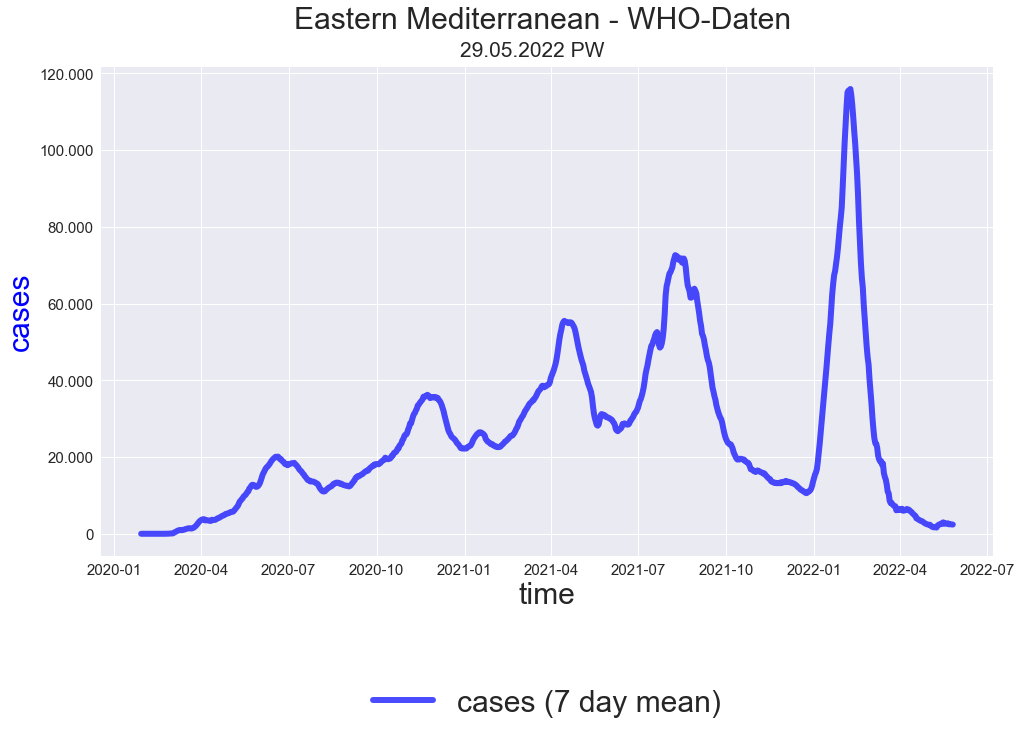

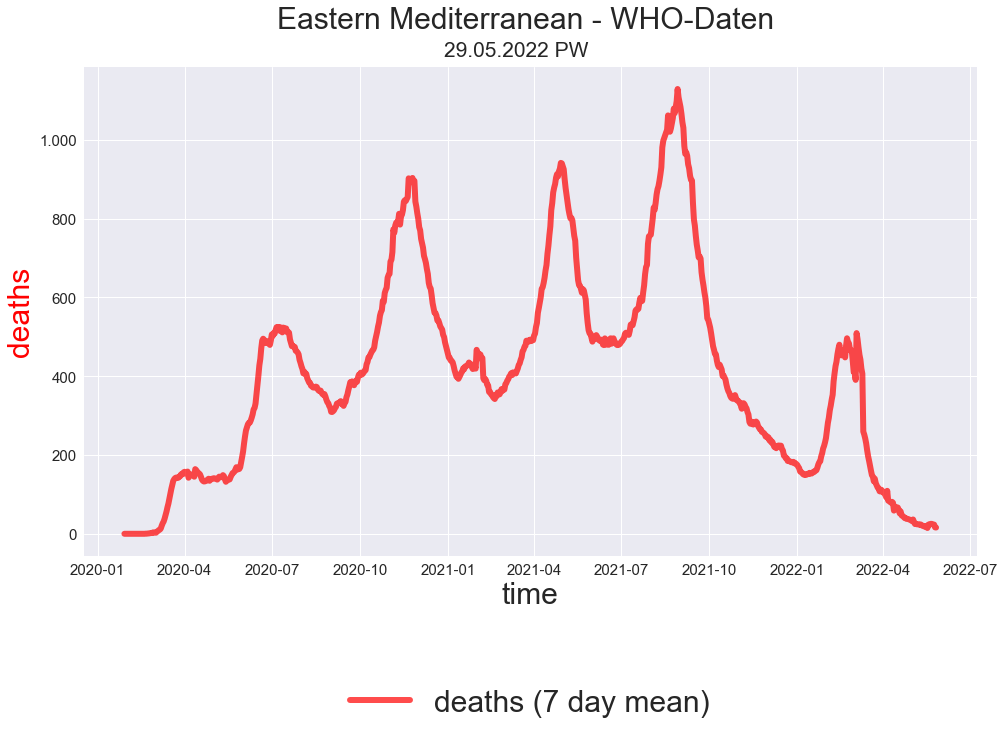

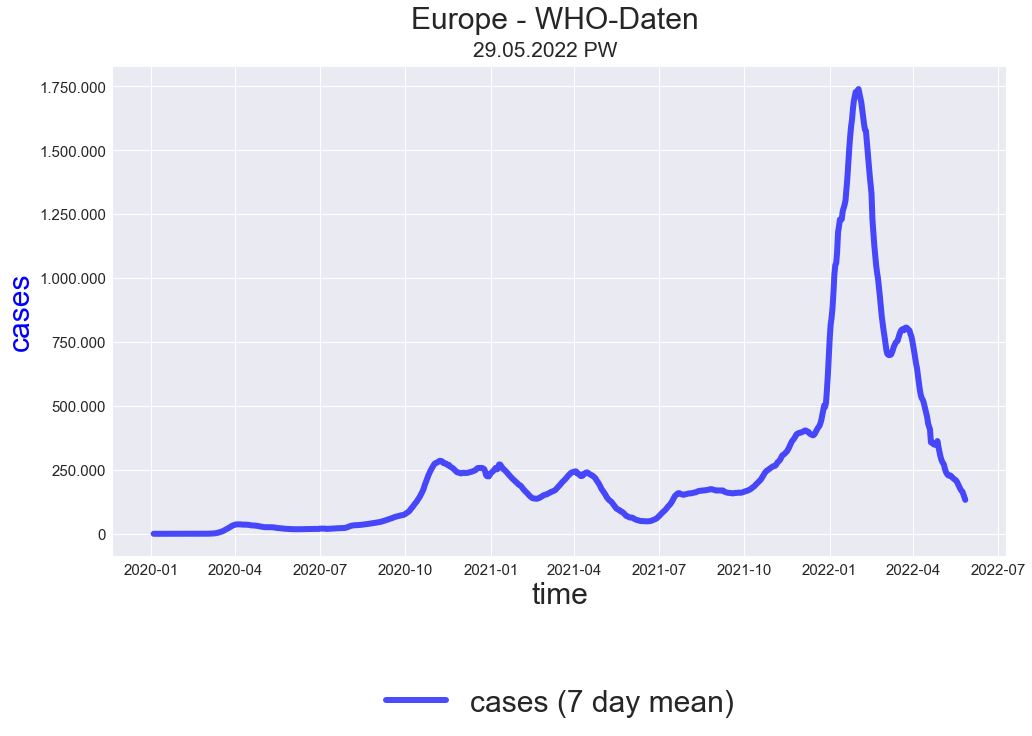

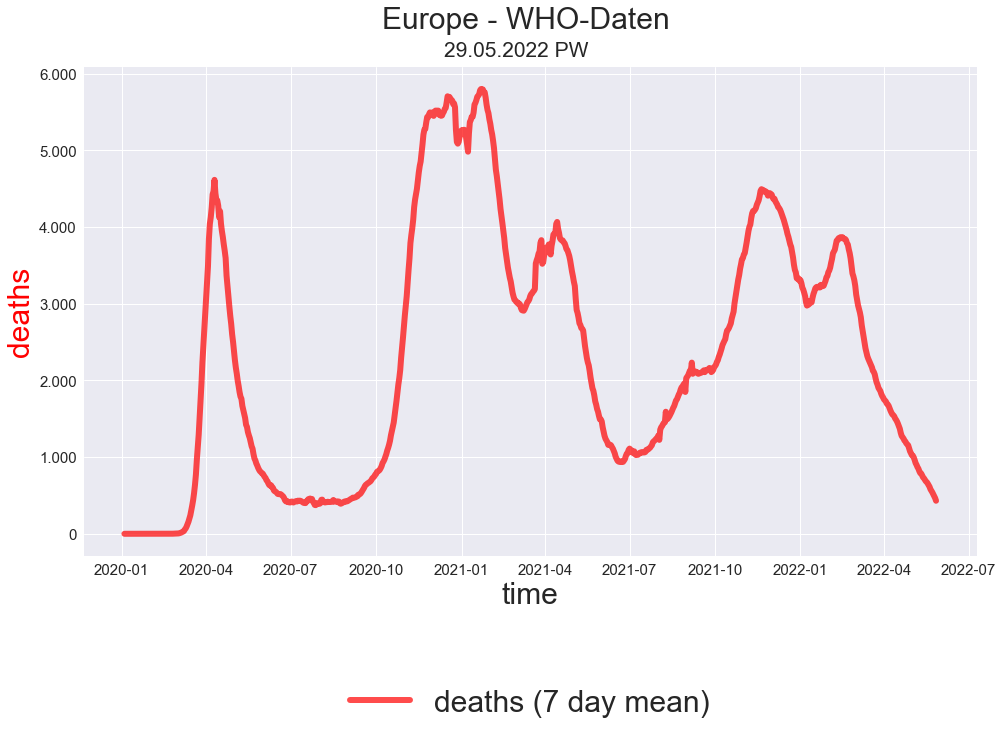

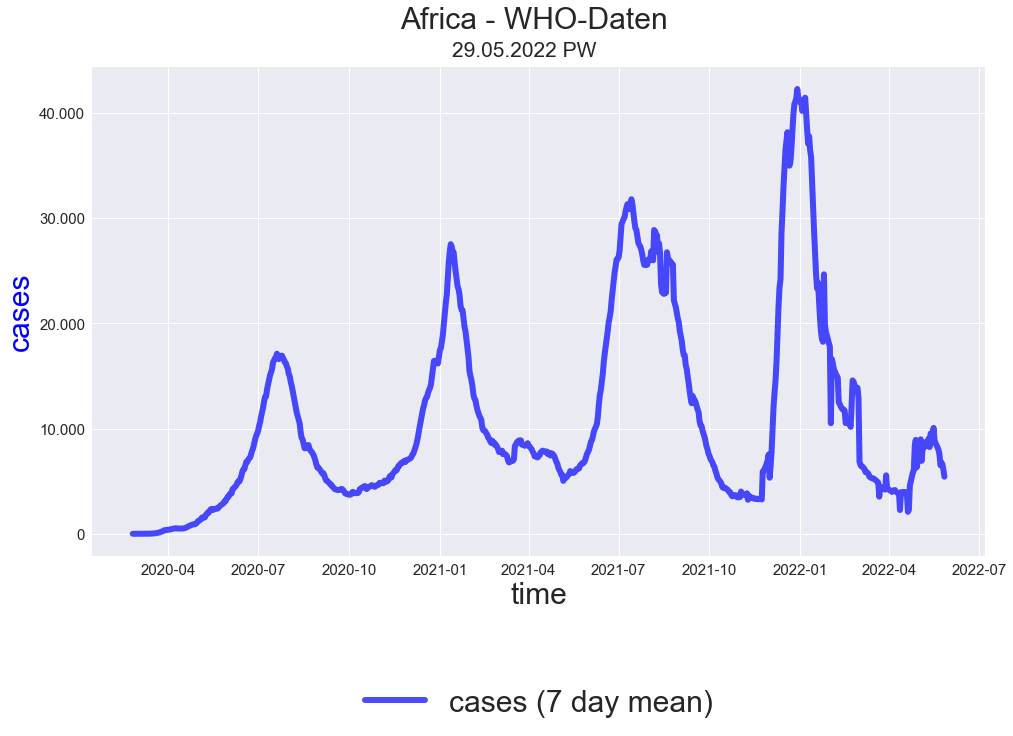

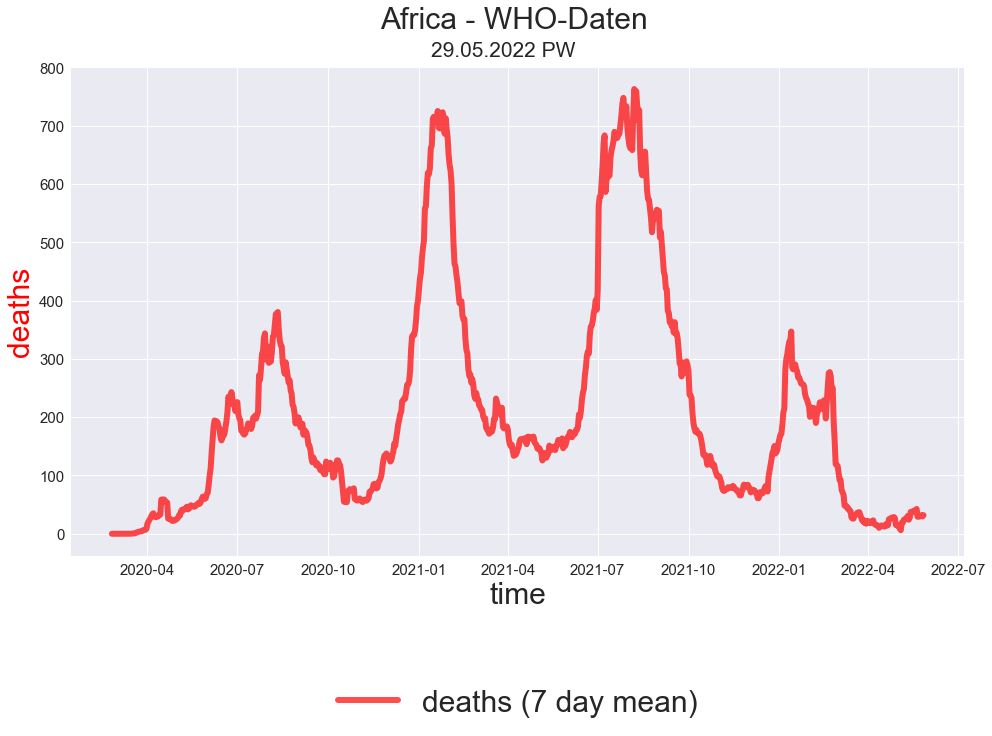

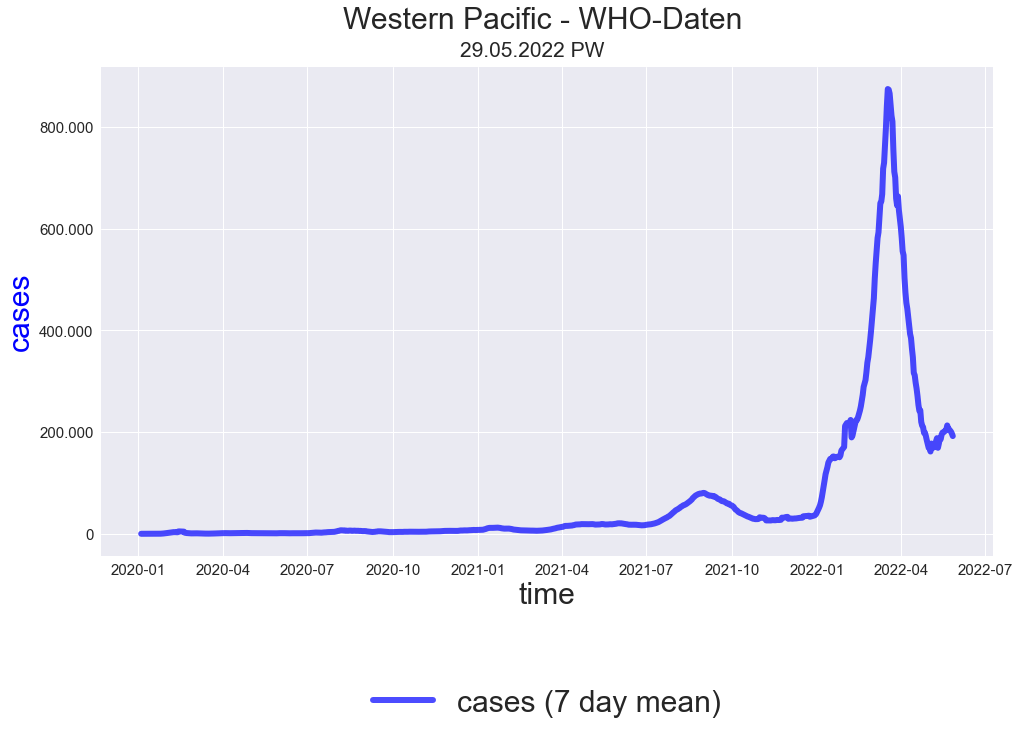

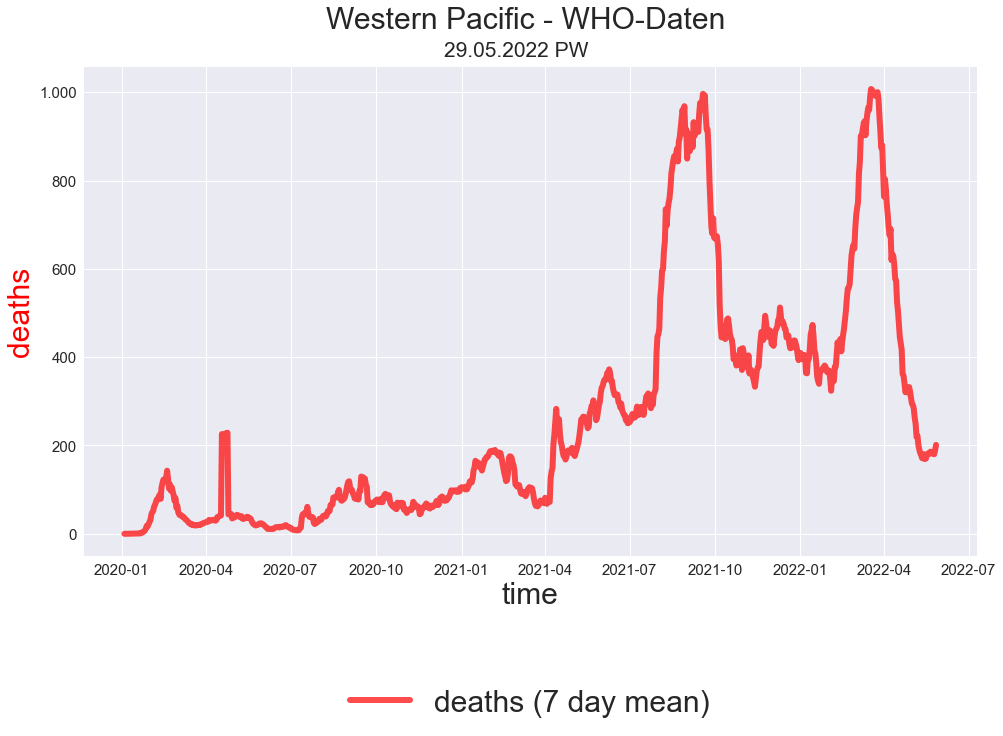

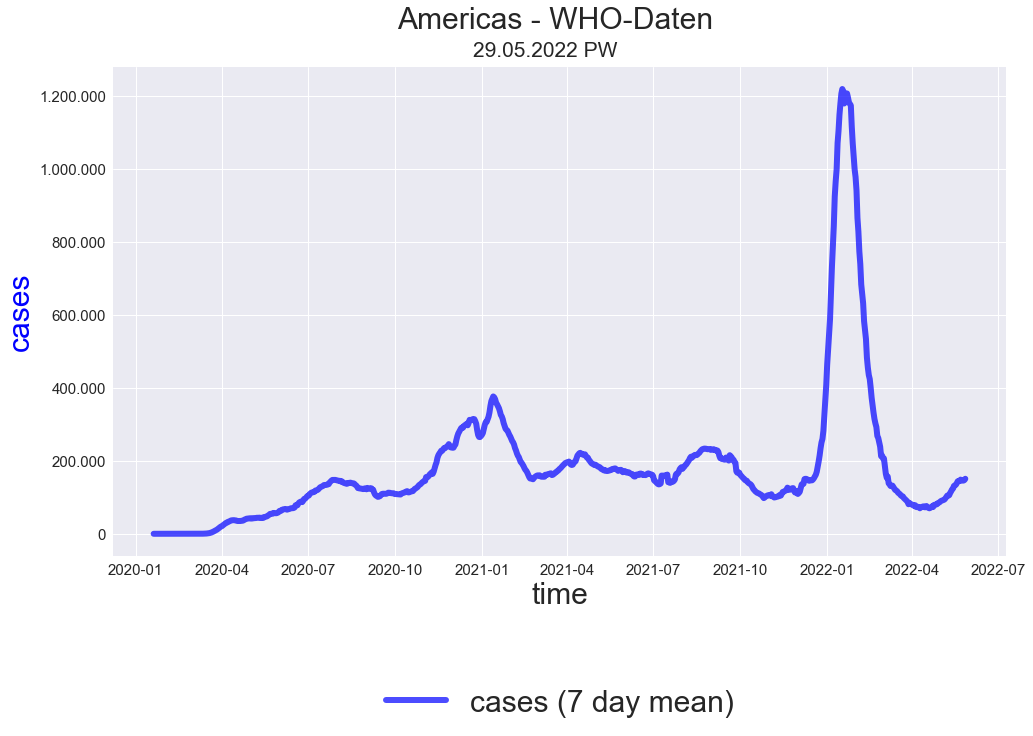

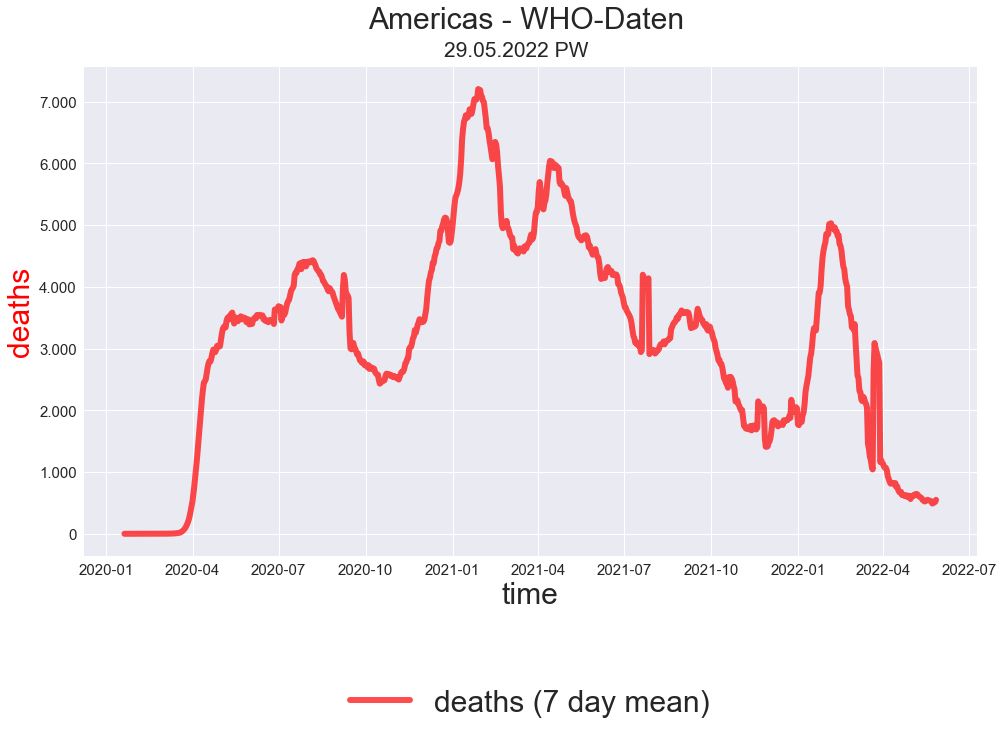

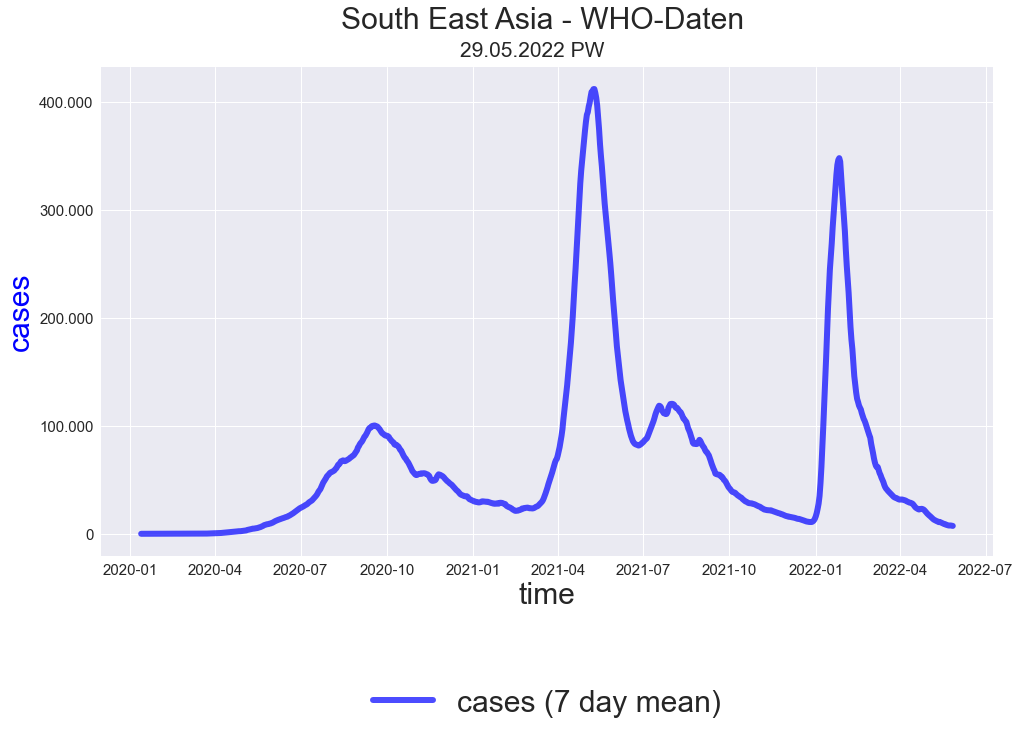

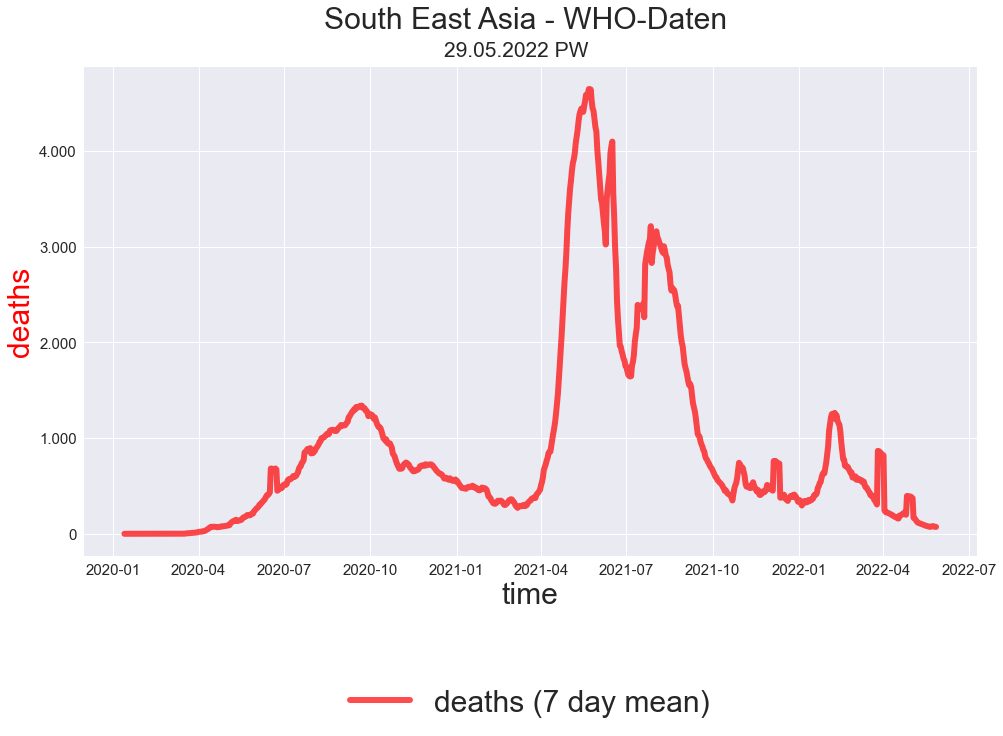

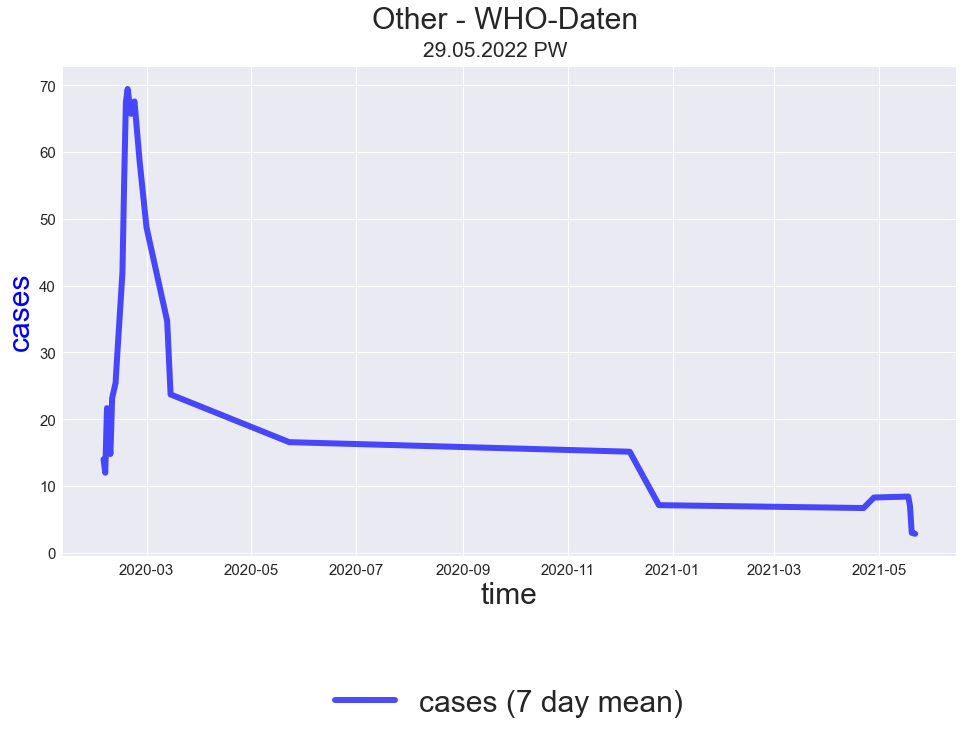

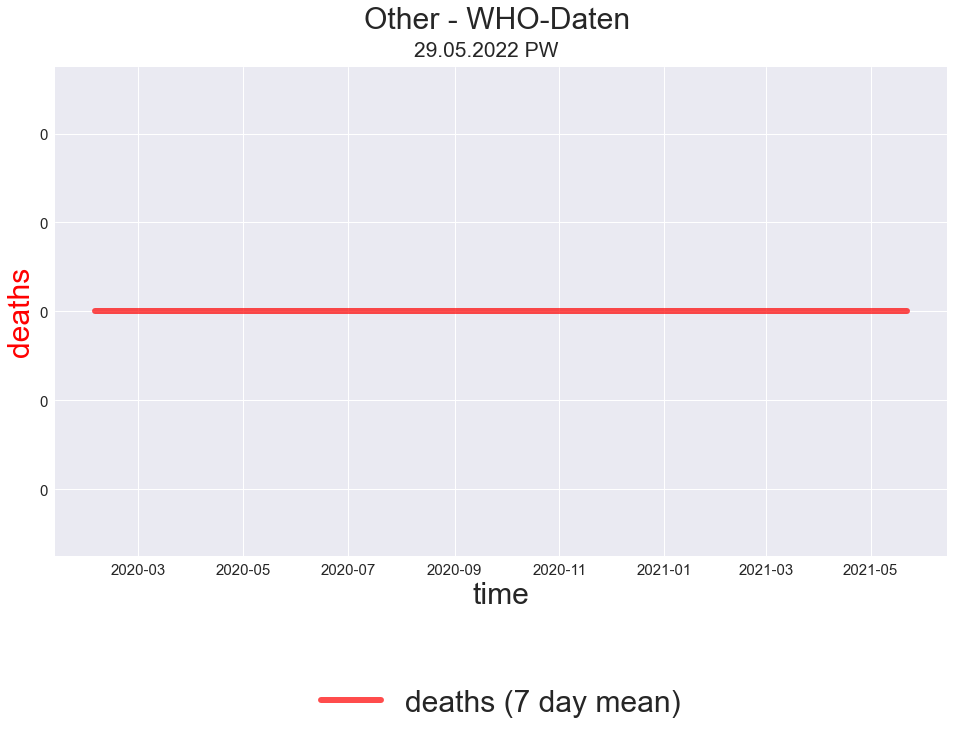

In [276]:
# function calls

for i in dictRegions:
    df, name_Region, bezeichnung_Region = create_df(i)
